<a href="https://colab.research.google.com/github/estherMC/formacio/blob/master/iaa2021_pac2_solution_ca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### M1.204 · IAA · PAC2 · 2020-21 · 2
##### Màster Enginyeria Informàtica · Estudis d’Informàtica Multimèdia i Telecomunicació
##### Universitat Oberta de Catalunya

# PAC2: REDUCCIÓ DE DIMENSIONALITAT I CLASSIFICACIÓ

## INTRODUCCIÓ

En aquesta prova d’avaluació estudiarem com aplicar tècniques de reducció
de la dimensionalitat a dades cartogràfiques sobre tipus de cobertures forestals.

## COMPETÈNCIES

En aquest enunciat es treballaran en un determinat grau les competències
generals de màster següents:

- Capacitat per a projectar, calcular i dissenyar productes, processos i
instal·lacions en tots els àmbits de l’enginyeria en informàtica.
- Capacitat per al modelat matemàtic, càlcul i simulació en centres
tecnològics i d’enginyeria d’empresa, particularment en tasques de
recerca, desenvolupament i innovació en tots els àmbits relacionats
amb l’enginyeria en informàtica.
- Capacitat per a l’aplicació dels coneixements adquirits i per solucionar
problemes en entorns nous o poc coneguts dins de contextos més
amplis i multidisciplinars, sent capaços d’integrar aquest
coneixements.
- Disposar d'habilitats per a l’aprenentatge continuat, autodirigit i autònom
- Capacitat per modelar, dissenyar, definir l’arquitectura, implementar,
gestionar, operar, administrar i mantenir aplicacions, xarxes, sistemes,
serveis i continguts informàtics.
- Capacitat per assegurar, gestionar, auditar i certificar la qualitat dels
desenvolupaments, processos, sistemes, serveis, aplicacions i
productes informàtics..

Les competències específiques d’aquesta assignatura que es treballaran són:
- Entendre què és l’aprenentatge automàtic en el context de la
Intel·ligència Artificial.
- Distingir entre els diferents tipus i mètodes d’aprenentatge.
- Aplicar les tècniques estudiades a un cas concret.

## RECURSOS

Aquesta PAC requereix els recursos següents:

Arxius proporcionats:

  * iaa2021_pac2_template_cat.ipynb

Complementaris:
  * Manual de teoria de l’assignatura, documentació de les llibreries utilitzades (_scikit-learn_, _pandas_, _seaborn_,...).

## LLIURAMENT I CRITERIS D'AVALUACIÓ

La pràctica s'ha de lliurar el **27 d'abril del 2021**.

El lliurament ha d'incloure una versió editada d'aquest cuadern (.ipynb). Es recomana l'ús de Google Colab (https://colab.research.google.com/). El codi de les solucions als exercicis s'ha de implementar i executar a les cel·les de codi proporcionades i les respostes justificades s'han d'afegir a les cel·les de text corresponents.

Totes les respostes han d'estar correctament raonades i justificades. **Les solucions que no vagin acompanyades de la corresponent resposta raonada no seran avaluades**.

## DESCRIPCIÓ DE LA PAC

En aquesta PAC s'aplicaran tècniques de reducció de la dimensionalitat i
classificació en dades cartogràfiques reals sobre tipus de cobertures forestals.


Concretament, ens basarem en les dades d’un estudi publicat a:

> Blackard, Jock A., and Denis J. Dean. "Comparative accuracies of artificial neural networks and discriminant analysis in predicting forest cover types from cartographic variables." _Computers and electronics in agriculture_ 24.3 (1999): 131-151.

El conjunt de dades inclou mostres de set tipus de cobertures forestals diferents estretes de mapes creats per el US Forest Service a partir de imatges aèries. Les variables cartogràfiques independents es van obtenir del _US Geological Survey_ i el _US Forest Service_. Las variables, entre altres, inclouen l’elevació del terreny, la distància horitzontal a la font d’aigua més propera o diferents mesures relatives de llum solar incident. En total, el conjunt de dades inclou 581,012 mostres i 54 variables.

Es pot consultar una descripció completa del conjunt de dades a:

https://archive.ics.uci.edu/ml/datasets/Covertype

L'objectiu d'aquesta prova és familiaritzar-vos i fer ús de mètodes de reducció
de la dimensionalitat diferents i dur a terme una comparativa entre diferents
tècniques de classificació automàtica i de validació.

Les solucions als exercicis estaran basades en la llibreria de codi obert _scikit-learn_ de Python, que incorpora una gran varietat d’algorismes d’aprenentatge automàtic, preprocessament, validació i visualització. Per tant, és molt important que consulteu la documentació oficial:

https://scikit-learn.org/stable/


## EXERCICI 1

Per començar, haurem d'importar alguns mòduls necessaris i carregar les dades. El conjunt de dades original està disponible a _scikit-learn_ i forma part del mòdul _datasets_.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html

En aquest exercici treballarem amb una versió simplificada del conjunt de dades original. La versió simplificada inclou menys mostres i atributs. Estudieu i executeu el codi proporcionat a la propera cel·la i familiaritzeu-vos amb el conjunt de dades.

In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np

features, labels = datasets.fetch_covtype(return_X_y=True)

n_samples = 5000
n_attributes = 10
df_features = pd.DataFrame(features[:n_samples, :n_attributes])
df_labels = pd.DataFrame({'label': labels[:n_samples]})

n_classes = len(np.unique(df_labels))

print("No. of attributes = " + str(len(df_features.columns)))
print("No. of classes = " + str(n_classes))
print("No. of samples = " + str(len(df_features)))
for cl in np.unique(df_labels):
  print("\--No. of samples class " + str(cl) + " = "
        + str(df_labels[df_labels==cl].count()['label']))

No. of attributes = 10
No. of classes = 7
No. of samples = 5000
\--No. of samples class 1 = 557
\--No. of samples class 2 = 948
\--No. of samples class 3 = 643
\--No. of samples class 4 = 1249
\--No. of samples class 5 = 945
\--No. of samples class 6 = 479
\--No. of samples class 7 = 179


**1.a) (1 PUNT) Exploreu els atributs del conjunt de dades.**

**Utilitzeu el mètode _describe_ de _pandas.DataFrame_. Quin tipus d'informació genera?**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

**Analitzeu la desviació típica de tots els atributs. Penseu que tenen rangs similars? Identifiqueu els atributs amb màxima i mínima dispersió (desviació típica) i proporcioneu-ne els valors. Podeu descriure breument què passaria si féssim servir aquests atributs directament per l’anàlisi PCA?**

In [ ]:
# Exercici 1.a: afegiu i executeu el vostre codi

std_series = df_features.describe().loc['std', :]

print("Minimum standard deviation = " + str(std_series.min()) + ' [Attribute: ' + str(std_series.idxmin()) + ']')
print("Maximum standard deviation = " + str(std_series.max()) + ' [Attribute: ' + str(std_series.idxmax()) + ']')

Minimum standard deviation = 9.400014417766092 [Attribute: 2]
Maximum standard deviation = 1564.7134293511488 [Attribute: 5]


_pandas.DataFrame.describe_ genera valors estadístics sobre el _dataframe_ (dispersió, distribució,...). Fem servir aquests valors per identificar les respostes sol·licitades.

Els atributs tenen diferents rangs i les seves desviacions típiques mostren valors extremadament diferents. Com veurem en els propers exercicis, fer l’anàlisi PCA a dades sense escalar porta a un anàlisi estadístic erroni. Si els valors dels diferents atributs no s’escalen a nivells comparables, aquells amb valors i desviacions típiques més altes poden “dominar” els altres encara que siguin menys significatius.


**1.b) (1 PUNT) L’anàlisi PCA sempre s’ha de realitzar sobre dades escalades. Els propers exercicis ens permetran estudiar i aprendre sobre PCA a més d’explorar l’impacte de l’escalat de les dades en el procés.**

**Apliqueu un anàlisi PCA a les dades dos cops:**

-	**Anàlisi PCA a les dades originals.**
-	**Anàlisi PCA a les dades estandarditzades fent servir _StandardScaler_:**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

**De manera similar a l’Exercici 1.a, però en aquest cas per els dos espais PCA obtinguts, identifiqueu els atributs amb màxima i mínima dispersió (desviació típica) i els seus corresponents valors. Comenteu els resultats.**

In [ ]:
# Exercici 1.b: afegiu i executeu el vostre codi

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feat_scaler_dict = {'StandardScaler':
                    StandardScaler().fit_transform(df_features)}
feat_scaler_dict['NoScaler'] = df_features.values

feat_pca_dict = {'StandardScaler':
                 PCA().fit_transform(feat_scaler_dict['StandardScaler'])}
feat_pca_dict['NoScaler'] = PCA().fit_transform(df_features)

# Identify attributes by min/max std
df_pca_noscaler = pd.DataFrame(feat_pca_dict['NoScaler'])
df_pca_scaler = pd.DataFrame(feat_pca_dict['StandardScaler'])

std_scaler = df_pca_noscaler.describe().loc['std', :]
print("PCA space (no scaler)")
print("Minimum standard deviation = " + str(std_scaler.min()) +
      ' [Attribute: ' + str(std_scaler.idxmin()) + ']')
print("Maximum standard deviation = " + str(std_scaler.max()) +
      ' [Attribute: ' + str(std_scaler.idxmax()) + ']')

std_noscaler = df_pca_scaler.describe().loc['std', :]
print("PCA space (StandardScaler)")
print("Minimum standard deviation = " + str(std_noscaler.min()) +
      ' [Attribute: ' + str(std_noscaler.idxmin()) + ']')
print("Maximum standard deviation = " + str(std_noscaler.max()) +
      ' [Attribute: ' + str(std_noscaler.idxmax()) + ']')

PCA space (no scaler)
Minimum standard deviation = 2.067763119059157 [Attribute: 9]
Maximum standard deviation = 1813.1191362942911 [Attribute: 0]
PCA space (StandardScaler)
Minimum standard deviation = 0.06347867063905707 [Attribute: 9]
Maximum standard deviation = 1.7746468957136647 [Attribute: 0]


Executeu el codi per visualitzar els valors demanats. Observeu que els atributs 0 i 9 tenen, respectivament, màxima i mínima dispersió en els dos casos degut a la projecció PCA. No obstant, les desviacions típiques a l’espai PCA fent servir dades sense escalar tenen un rang molt més ampli.

La implementació proposada utilitza dos diccionaris: _feat_scaler_dict_, que emmagatzema les dades analitzades amb PCA (escalades i sense escalar), i _feat_pca_dict_, que emmagatzema els nous espais PCA obtinguts. Aquesta implementació ens serà útil en els propers exercicis 1.c i 1.d.


**1.c) (1 PUNT) Mostreu tres gràfiques de dispersió (_scatter plot_) de les dues primeres components per:**

-	**Les dades originals.**
-	**L’espai PCA obtingut a partir de les dades sense escalar (dades originals projectades al nou espai PCA).**
-	**L’espai PCA obtingut a partir de les dades escalades (dades originals escalades i, posteriorment, projectades al nou espai PCA).**

**Comenteu els resultats.**


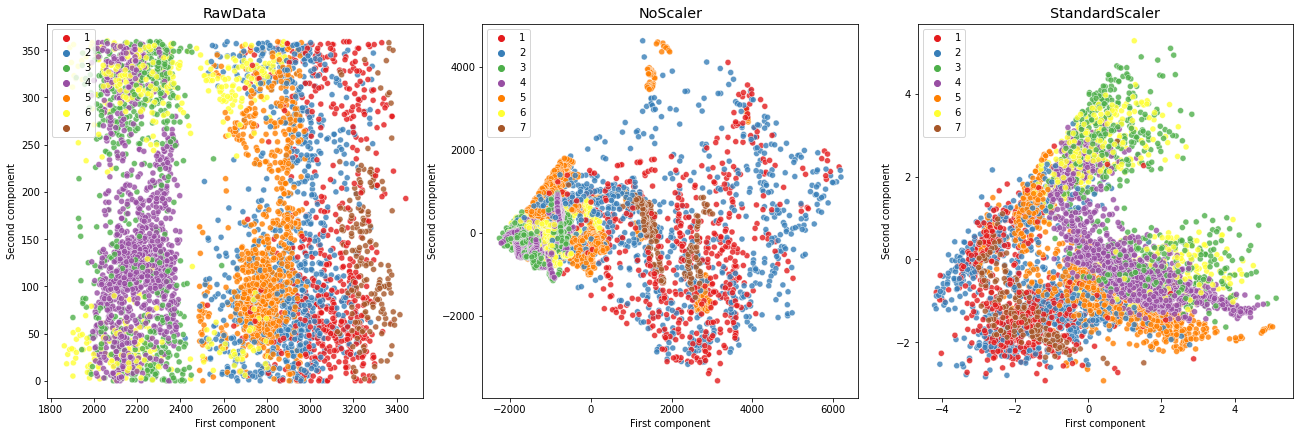

In [ ]:
# Exercici 1.c: afegiu i executeu el vostre codi

import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(x, y, hue, ax, title):
  sns.scatterplot(data=None, x=x, y=y, hue=hue, alpha=0.8,
                palette=sns.color_palette('Set1', n_classes), ax=ax)

  ax.set_xlabel('First component')
  ax.set_ylabel('Second component')
  ax.set_title(title, loc='center', fontsize='x-large')
  ax.legend(loc=2)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))#, sharey='row')

draw_plot(np.array(df_features)[:,0], np.array(df_features)[:,1],
          np.array(df_labels).flatten(), axes[0], 'RawData')

for i in range(len(feat_pca_dict.keys())):
  ind = (i-1)%len(feat_pca_dict)
  trs = list(feat_pca_dict.keys())[ind]
  X = feat_pca_dict[trs]

  draw_plot(X[:,0], X[:,1], np.array(df_labels).flatten(), axes[i+1], trs)

plt.tight_layout(pad=0.5, )
plt.show()

L’espai PCA maximitza la variància dels eixos de manera que les primeres components concentrin la majoria de la variància de les dades, transformació que sovint augmenta el seu valor descriptiu. Aquest efecte es pot observar fins i tot considerant només les dues primeres components de l’espai PCA (eixos amb la màxima variància). En aquest cas, la gràfica _StandardScaler_ ja mostra un cert nivell d’agrupament de les classes, mentre que la gràfica _NoScaler_ fins i tot sembla empitjorar la separabilitat de les dades originals. PCA sobre conjunts de dades escalats fa les classes més distingibles perquè la variància dels diferents atributs s’ha transformat prèviament a nivells comparables. En dades sense escalar, els atributs amb més variància no són necessàriament els que tenen més impacte en la separabilitat de les classes.

Observeu que la gràfica _RawData_ també presenta un cert nivell de separabilitat, probablement degut a que el primer atribut (elevació del terreny) deu estar fortament relacionat amb el tipus de cobertura forestal.

**1.d) (1 PUNT) Per els dos espais PCA obtinguts, amb dades escalades i sense escalar, utilitzeu la llibreria _SeaBorn_ i el seu mètode _boxplot_ per crear 10 diagrames de caixes (per cadascun) i visualitzar els atributs (eix y) per cada classe del conjunt de dades (eix x).**

**_SeaBorn_ és una llibreria de Python per visualització de dades basada en _matplotlib_ que implementa una interfície d’alt nivell per crear informatius i atractius gràfics estadístics.**

https://seaborn.pydata.org/

https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Nota: Utilitzeu _matplotlib.pyplot.subplots_ amb paràmetre _sharey='row'_ per crear una reixa de 2x10 eixos (2 files per els dos espais PCA i 10 columnes per els 10 atributs).**

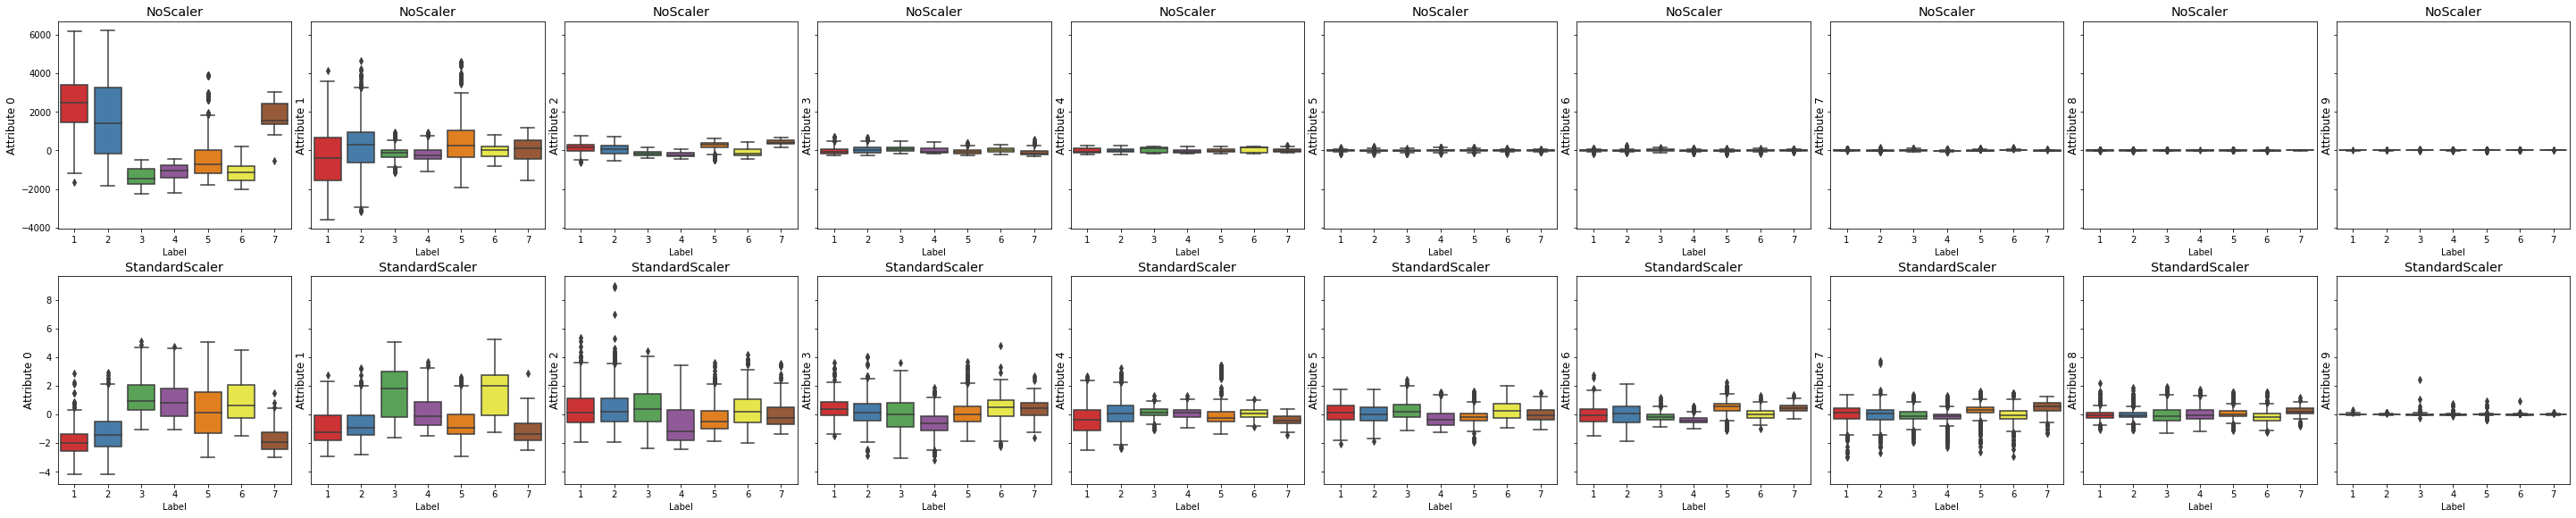

In [ ]:
# Exercici 1.d: afegiu i executeu el vostre codi

import seaborn as sns
# n_columns = [0, 10, 20, 30, 40, 50]
# n_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, axes = plt.subplots(nrows=2, ncols=n_attributes,
                         figsize=(n_attributes*4,8), sharey='row')

for i in range(len(feat_pca_dict.keys())):
  ind = (i-1)%len(feat_pca_dict)
  trs = list(feat_pca_dict.keys())[ind]
  features_pca = feat_pca_dict[trs]

  for col in range(n_attributes):
      ax = axes[i, col]
      sns.boxplot(y=features_pca[:,col], x=df_labels['label'],
                  palette=sns.color_palette('Set1', n_classes), ax=ax)
      ax.set_title(trs, fontsize='x-large')
      ax.set_ylabel(str('Attribute ') + str(col), fontsize='large')
      ax.set_xlabel('Label')

plt.tight_layout(pad=0.5)
plt.show()

Els diagrames de caixes confirmen els problemes de realitzar un anàlisi PCA sobre dades sense escalar. L’espai PCA a partir de dades escalades mostra una progressiva disminució de la variància, amb les diferents caixes dels gràfics cada cop més alineades a mesura que ens allunyem del primers atributs o components (esquerra a dreta). En canvi, la variància a l’espai PCA a partir de dades sense escalar es concentra en les dues primeres components, amb un descens dràstic a partir de la tercera.

**1.e) (1 PUNT) Mostreu els gràfics de la variància acumulada explicada per els espais PCA en relació al nombre de components (a partir de dades escalades i sense escalar). Compareu-los i comenteu la relació amb els diagrames de caixes de l’exercici anterior. En el cas de les dades escalades, identifiqueu quants components PCA són necessaris per representar un 95% de la variància de les dades originals. Quin és el problema quan l’anàlisi PCA es realitza sobre dades sense escalar?**

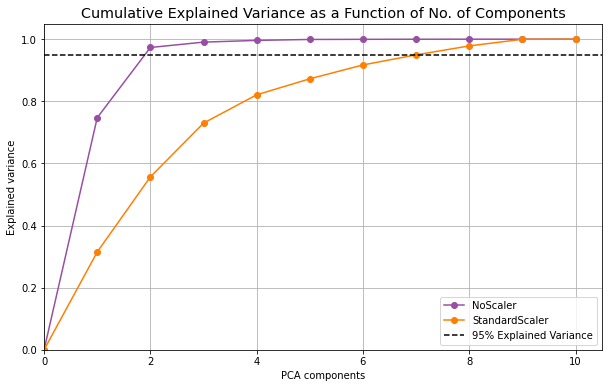

Components to represent 95% variance: 8


In [ ]:
# Exercici 1.e: afegiu i executeu el vostre codi

pca_instance_dict = {'NoScaler':
                     PCA().fit(df_features)}
pca_instance_dict['StandardScaler'] = PCA().fit(feat_scaler_dict['StandardScaler'])

cumsum_list = [
  np.concatenate([[0],pca_instance_dict[trans].explained_variance_ratio_.cumsum()])
  for trans in pca_instance_dict.keys()]
df_cumsum = pd.DataFrame(np.array(cumsum_list).T)
df_cumsum.columns = pca_instance_dict.keys()

fig, ax = plt.subplots(1,1,figsize=(10, 6), sharex=True)

df_cumsum.plot(ax=ax, color=sns.color_palette('Set1',5)[3:5],
               kind='line', marker='o')
ax.axhline(y = 0.95, color='k', linestyle='--', label = '95% Explained Variance')
ax.grid()
plt.title('Cumulative Explained Variance as a Function of No. of Components',
          fontsize='x-large')
ax.set_ylabel('Explained variance')
ax.set_xlabel('PCA components')
ax.set_xlim([0,len(cumsum_list[0])-0.5])
ax.set_ylim([0,1.05])
ax.legend(loc='lower right')
plt.show()

print('Components to represent 95% variance: ' +
      str(sum(df_cumsum['StandardScaler']<0.95)))
# print(df_cumsum['StandardScaler'].iloc[7])

Les gràfiques de variància acumulada mostren, de nou, com l’anàlisi PCA de les dades sense escalar acumula variància a les dues primeres components. Atributs amb més variància erròniament contribueixen més degut a que no s’han escalat prèviament a nivells comparables.

A l’espai PCA a partir de dades escalades 8 components permeten representar el 95% de la variància de les dades originals (7 components també es considera una resposta correcta, amb un 94.94% de la variància).

**1.f) (1 PUNT) Fent servir dades escalades, reconstruïu el conjunt de dades amb 5 components PCA (mètode _inversetransform_) i calculeu la pèrdua d’informació respecte les dades originals. Per fer-ho, calculeu el promig de les diferències elevades al quadrat entre cada element del conjunt reconstruït i l’original. Quina relació tenen aquests valors respecte a les variances acumulades calculades a l’apartat anterior?**

In [ ]:
# Exercici 1.f: afegiu i executeu el vostre codi

scaled_features = feat_scaler_dict['StandardScaler']

pca_instance = PCA(n_components=5)
pca_instance.fit(scaled_features)
values_proj = pca_instance.transform(scaled_features)
features_proj = pca_instance.inverse_transform(values_proj)
loss = ((scaled_features - features_proj) ** 2).mean()

print("Projection loss (5 components): " + str(loss))

print("Cumulative variance ratio with 5 PCA components: "
      + str(df_cumsum['StandardScaler'].loc[5]))

print("Loss + cumulative variance: "
      + str(loss + df_cumsum['StandardScaler'].loc[5]))

Projection loss (5 components): 0.12761151839288187
Cummulative variance ratio with 5 PCA components: 0.8723884816071181
Loss + cummulative variance: 1.0


L’error de projecció és el complementari de la variància acumulada.

## EXERCICI 2

En aquest exercici treballarem amb diferents algorismes de classificació, tècniques de validació i mesures d’avaluació. Amb aquest objectiu, farem servir una nova versió del conjunt de dades. El nombre de mostres s’ha reduït encara més i la quantitat de classes s’ha reduït a dos per facilitar la comparació entre diferents algorismes de classificació. Estudieu i executeu el codi proporcionat a la següent cel·la.

In [ ]:
n_samples2 = 700
n_attributes2 = 54
df_features2 = pd.DataFrame(features[:n_samples2, :n_attributes2])

labels2 = [1 if value==2 else 0 for value in labels]
df_labels2 = pd.DataFrame({'label': labels2[:n_samples2]})

print("No. of attributes = " + str(len(df_features2.columns)))
print("No. of classes = " + str(len(np.unique(labels2))))
print("No. of samples = " + str(len(df_features2)))
print("\--No. of samples class 0 = " +
      str(df_labels2[df_labels2==0].count()['label']))
print("\--No. of samples class 1 = " +
      str(df_labels2[df_labels2==1].count()['label']))

No. of attributes = 54
No. of classes = 2
No. of samples = 700
\--No. of samples class 0 = 289
\--No. of samples class 1 = 411


**2.a) (1.5 PUNTS) Entreneu els següents classificadors, implementats en _scikit-learn_, fent servir el 80% de les dades disponibles (conjunt d’entrenament) i calculeu el temps d’entrenament per cadascun (mòdul _timeit_ en Python):**

-	**K Nearest Neighbours: 5 veïns (primer paràmetre).**
-	**Linear SVM: kernel =”rbf”, C=25, i valors per defecte per la resta de paràmetres.**
-	**Decision Tree: criterion =”entropy”, max_depth =5, i valors per defecte per la resta de paràmetres.**
-	**AdaBoost: valors per defecte.**
-	**Gaussian Naive Bayes: valors per defecte.**


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
# Exercici 2.a: afegiu i executeu el vostre codi

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_roc_curve

import timeit

import matplotlib.pyplot as plt

names = ['Nearest Neighbours (5)',
         'SVM rbf C=25',
         'Decision Tree',
         'AdaBoost',
         'Naive Bayes']
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=25),
    DecisionTreeClassifier(criterion='entropy', max_depth=5),
    AdaBoostClassifier(),
    GaussianNB()]

train_feat, test_feat, train_labels, test_labels = train_test_split(
    df_features2, df_labels2, train_size=0.8, random_state=0)

print('Training classifiers...')
for name, clf in zip(names, classifiers):
  print(name + "...")

  starttime = timeit.default_timer()
  clf.fit(train_feat, np.ravel(train_labels))
  print("...training time:", timeit.default_timer() - starttime)


Training classifiers...
Nearest Neighbours (5)...
...training time: 0.008061814000029699
SVM rbf C=25...
...training time: 0.03457810100007919
Decision Tree...
...training time: 0.006376221999971676
AdaBoost...
...training time: 0.10739330500018696
Naive Bayes...
...training time: 0.001670356999966316


Executeu el codi per visualitzar els temps d’entrenament de tots els classificadors.

**2.b) (1 PUNT) Avaluació del funcionament dels classificadors entrenats a l’Exercici 2.a.**

**Mostreu en una única figura totes les curves ROC corresponents als classificadors fent servir les dades restants (20% com a conjunt de test). Comenteu els resultats i compareu el funcionament dels diferents algorismes. Quin d’ells seria la vostra elecció per la tasca plantejada?**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

Drawing ROC curves...
Nearest Neighbours (5)...
SVM rbf C=25...
Decision Tree...
AdaBoost...
Naive Bayes...


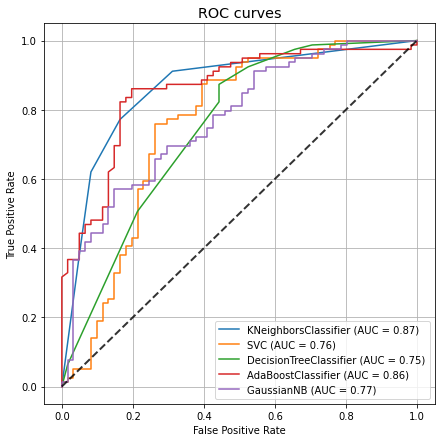

In [ ]:
# Exercici 2.b: afegiu i executeu el vostre codi

fig, ax = plt.subplots(figsize=(7, 7))
print('Drawing ROC curves...')
for name, clf in zip(names, classifiers):
  print(name + "...")
  plot_roc_curve(clf, test_feat, test_labels, ax=ax)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
        label='Chance', alpha=.8)
plt.title('ROC curves', fontsize='x-large')
ax.grid()

Els diferents gràfics suggereixen un millor funcionament de Nearest Neighbours i Adaboost.

**2.c) (1.5 PUNTS) Entreneu i valideu els mateixos classificadors descrits a l’Exercici 2.a fent servir validació creuada amb k=5 a tot el conjunt de dades.**
**Obteniu accuracy, precision, recall, F1-score i ROC-AUC per cada classificador i comenteu els resultats.**


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

**Hint: Feu servir _sklearn.model_selection.RepeatedStratifiedKFold_ (amb paràmetres *n_repeats*=1 i _random_state_=1) en el paràmetre _cv_ de _cross_validate_ per crear _splits_ idèntics per validar tots els classificadors .**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

In [ ]:
n# Exercici 2.c: afegiu i executeu el vostre codi

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt

metric_names = ['accuracy','precision', 'recall', 'f1', 'roc_auc']
n_kfolds = 5

cv = RepeatedStratifiedKFold(n_splits=n_kfolds, n_repeats=1, random_state=1)

scores = {}
summary = []

print('Testing classifiers...')
for name, clf in zip(names, classifiers):
  print(name + "...")

  scores[name] = cross_validate(clf, df_features2, np.ravel(df_labels2),
                                cv=cv, scoring=metric_names)

  print("Accuracy: {:.2f}({:.2f}) - Precision: {:.2f}({:.2f}) - Recall: {:.2f}({:.2f}) - F1: {:.2f}({:.2f}) - AUC: {:.2f}({:.2f})".
    format(scores[name]['test_' + metric_names[0]].mean(), scores[name]['test_' + metric_names[0]].std(),
           scores[name]['test_' + metric_names[1]].mean(), scores[name]['test_' + metric_names[1]].std(),
           scores[name]['test_' + metric_names[2]].mean(), scores[name]['test_' + metric_names[2]].std(),
           scores[name]['test_' + metric_names[3]].mean(), scores[name]['test_' + metric_names[3]].std(),
           scores[name]['test_' + metric_names[4]].mean(), scores[name]['test_' + metric_names[4]].std()))

Testing classifiers...
Nearest Neighbours (5)...
Accuracy: 0.80(0.01) - Precision: 0.84(0.01) - Recall: 0.81(0.02) - F1: 0.82(0.01) - AUC: 0.86(0.02)
SVM rbf C=25...
Accuracy: 0.74(0.03) - Precision: 0.72(0.02) - Recall: 0.90(0.03) - F1: 0.80(0.02) - AUC: 0.78(0.06)
Decision Tree...
Accuracy: 0.72(0.04) - Precision: 0.74(0.05) - Recall: 0.84(0.04) - F1: 0.78(0.02) - AUC: 0.77(0.02)
AdaBoost...
Accuracy: 0.78(0.01) - Precision: 0.80(0.01) - Recall: 0.85(0.01) - F1: 0.82(0.01) - AUC: 0.87(0.01)
Naive Bayes...
Accuracy: 0.71(0.02) - Precision: 0.75(0.03) - Recall: 0.76(0.02) - F1: 0.76(0.01) - AUC: 0.75(0.02)


Nearest Neighbours i SVM proporcionen la precision i recall més altes, respectivament. No obstant, els F1-score i AUC més alts i, per tant, el millor funcionament en general, s'obtenen amb el classificador AdaBoost, amb Nearest Neighbours molt a prop.